<a href="https://colab.research.google.com/github/kragtenb/SelfDriving-RC-deep-learning/blob/main/OpenCVPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Transformations

## Task 1:

1. Load an image of your choice using cv2.imread().
Use cv2.resize() to resize the image to half its original size.
2. Select a region in the original image and create a cropped version.
3. Display the original, resized, and cropped images using cv2.imshow().

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

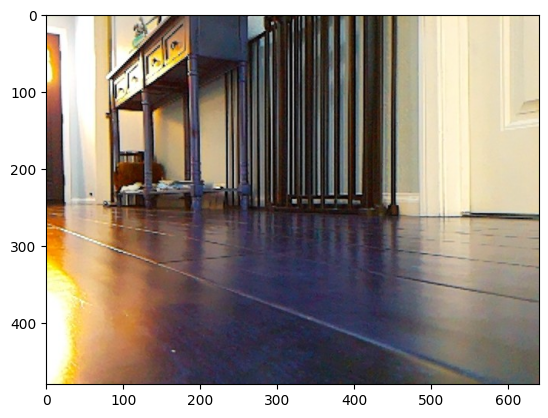

In [ ]:
image_file = '/home/blake/SelfDriving-RC-deep-learning/TrainingData/Images/2024_03_25_T_11_08_55.jpg'
image = cv.imread(image_file)

# If your image is in BGR format (OpenCV default), convert it to RGB for matplotlib
#if image.shape[2] == 3:
#  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

def display_image(image):
  plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
  plt.show()

# Display the image
plt.imshow(image)
plt.show()

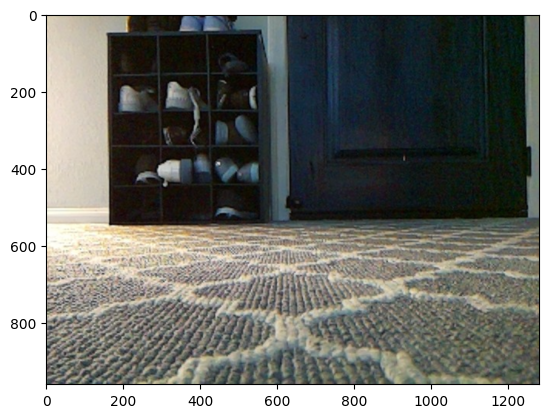

In [ ]:
image_file = '/home/blake/SelfDriving-RC-deep-learning/TrainingData/Images/2024_03_25_T_11_05_58.jpg'
image = cv.imread(image_file)

# resize the image to half
image_height = int(image.shape[0] / 2)
image_width = int(image.shape[1] / 2)
resized = cv.resize(image, (image_width, image_height))

# Resize to half the original size
half_size_image = cv.resize(image, (0, 0), fx=2, fy=2)

# plt.imshow(resized)
plt.imshow(half_size_image)
plt.show()

In [ ]:
# Crop image

# Top left corner
cropped_image = image[:image.shape[0]//4, :image.shape[1]//4,:]

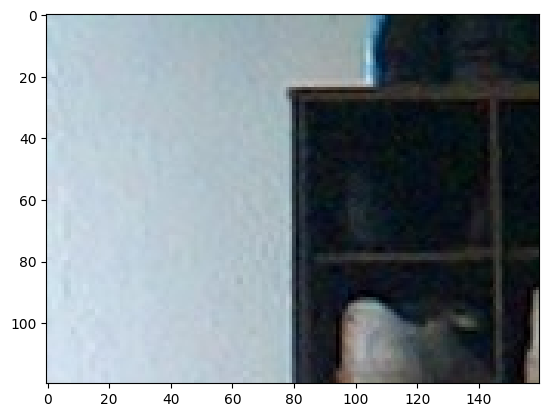

In [ ]:
plt.imshow(translate_to_rgb(cropped_image))
plt.show()

#Task 2:

1. Load another image.
2. Resize it to a specific resolution (e.g., 300x150). Pay attention to the interpolation parameter when resizing. Experiment with cv2.INTER_AREA and cv2.INTER_LINEAR to see the differences.

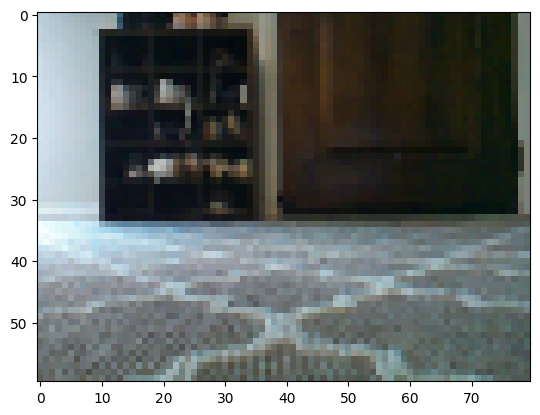

In [ ]:
resized_area = cv.resize(image, (image.shape[1]//8, image.shape[0]//8), interpolation=cv.INTER_AREA)

plt.imshow(resized_area)
plt.show()

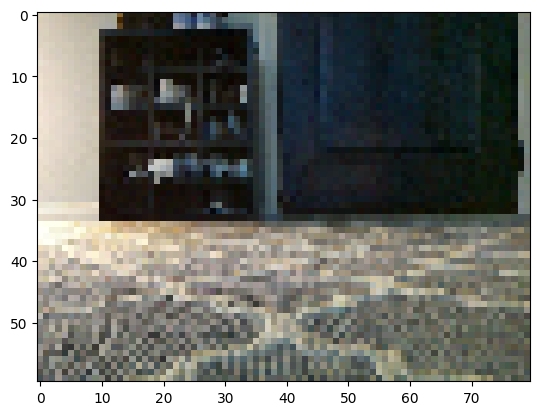

In [ ]:
resized_linear = cv.resize(image, (image.shape[1]//8, image.shape[0]//8), interpolation=cv.INTER_LINEAR)

plt.imshow(resized_linear)
plt.show()

# Rotation & Flipping

## Task 3:

1. Use cv2.flip() to create flipped versions of an image, both horizontally and vertically. Experiment with different flipCode values.


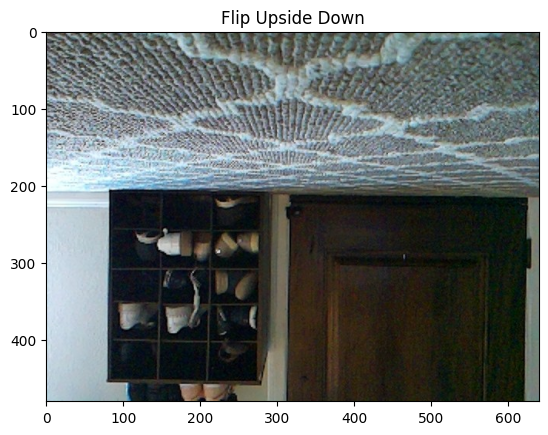

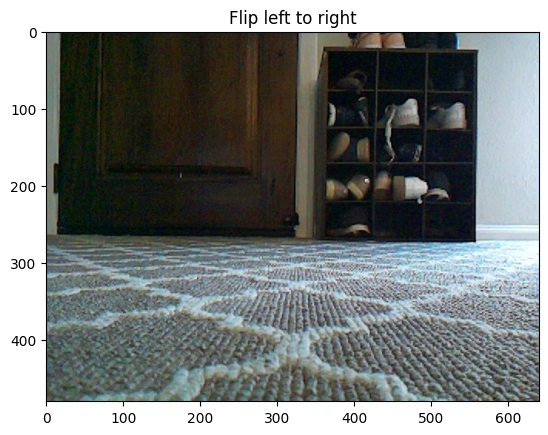

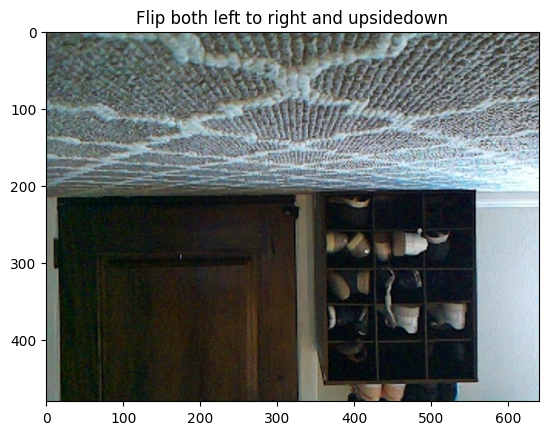

In [ ]:
flip_0 = cv.flip(image, 0)
flip_1 = cv.flip(image, 1)
flip_neg_1 = cv.flip(image, -1)

plt.title("Flip Upside Down")
plt.imshow(flip_0)
plt.show()
plt.title("Flip left to right")
plt.imshow(flip_1)
plt.show()
plt.title("Flip both left to right and upsidedown")
plt.imshow(flip_neg_1)
plt.show()

# Task 4

1. Load an image.
2. Calculate a rotation matrix using cv2.getRotationMatrix2D() with a center point, an angle (say, 45 degrees), and a scaling factor.
3. Apply the rotation using cv2.warpAffine() and display the results.

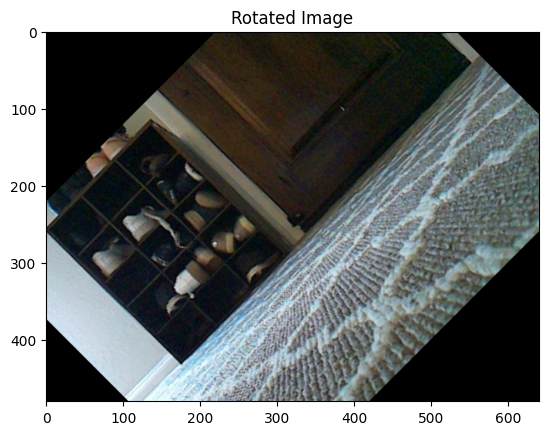

In [ ]:
rotation_matrix = cv.getRotationMatrix2D((image.shape[1]//2, image.shape[0]//2), 45, 1)
rotated_image = cv.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))
plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.show()

# Color Conversion

## Task 5

1. Load a color image.
2. Convert it to grayscale using cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).
3. Display both the original and grayscale versions.

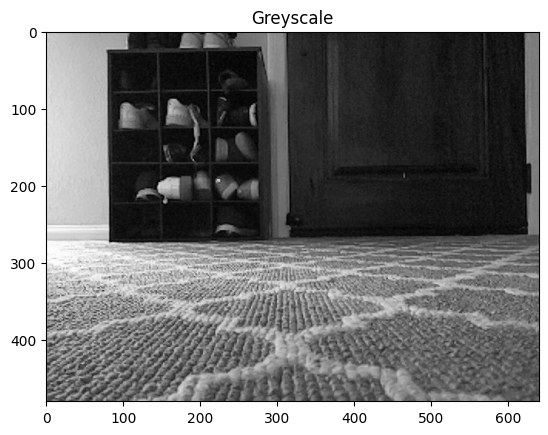

In [ ]:
grayscale_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

plt.title("Greyscale")
display_image(grayscale_image)

# Exploring HSV

## Task 6

1. Convert the color image to the HSV color space using cv2.cvtColor(image, cv2.COLOR_BGR2HSV).

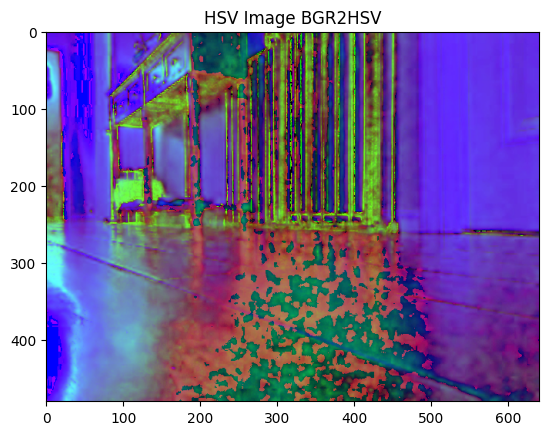

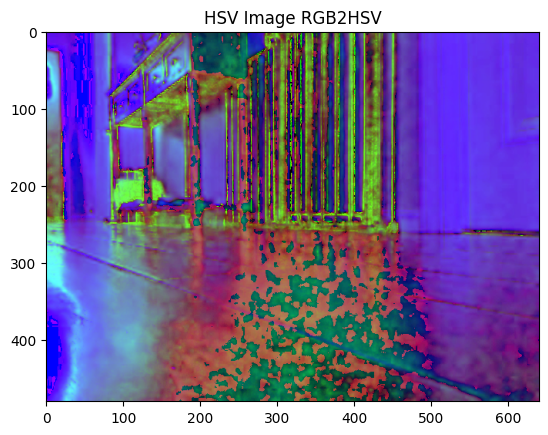

In [ ]:
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
plt.title("HSV Image BGR2HSV")
plt.imshow(hsv_image)
plt.show()

hsv_image = cv.cvtColor(cv.cvtColor(image, cv.COLOR_BGR2RGB), cv.COLOR_RGB2HSV)
plt.title("HSV Image RGB2HSV")
plt.imshow(hsv_image)
plt.show()

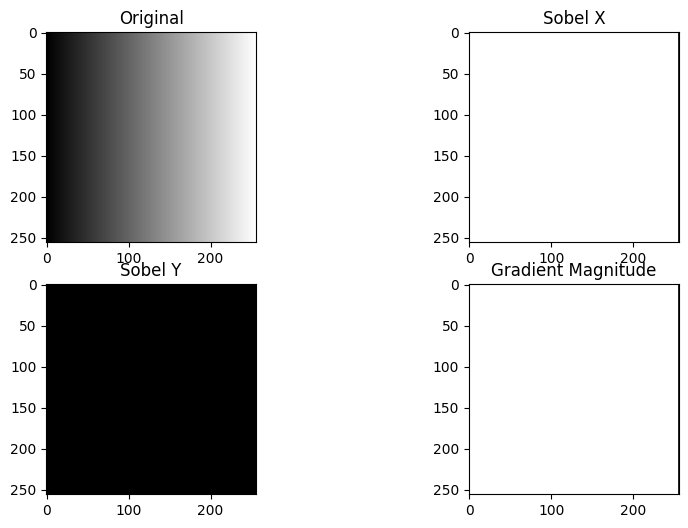

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a gradient test image
test_image = np.linspace(0, 255, 256).astype('uint8')
test_image = np.tile(test_image, (256, 1))

# Calculate gradients using Sobel filters
sobelx = cv2.Sobel(test_image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal gradients
sobely = cv2.Sobel(test_image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical gradients

# Calculate gradient magnitude
magnitude = np.sqrt(sobelx**2 + sobely**2)

# Visualize results
plt.figure(figsize=(10, 6))

plt.subplot(221), plt.imshow(test_image, cmap='gray'), plt.title('Original')
plt.subplot(222), plt.imshow(sobelx, cmap='gray'), plt.title('Sobel X')
plt.subplot(223), plt.imshow(sobely, cmap='gray'), plt.title('Sobel Y')
plt.subplot(224), plt.imshow(magnitude, cmap='gray'), plt.title('Gradient Magnitude')
plt.show()
